# 修正ds2s-OVモデルの時空図と基本図

In [1]:
import random
import numpy as np
import matplotlib.pyplot as plt
import json

In [2]:
from ds2s_OV import ds2s_OV, plot_pattern, plot_fundamental
from ds2s_OV_xmin import ds2s_OV_xmin

## 典型的なds2s-OVモデルの時空図

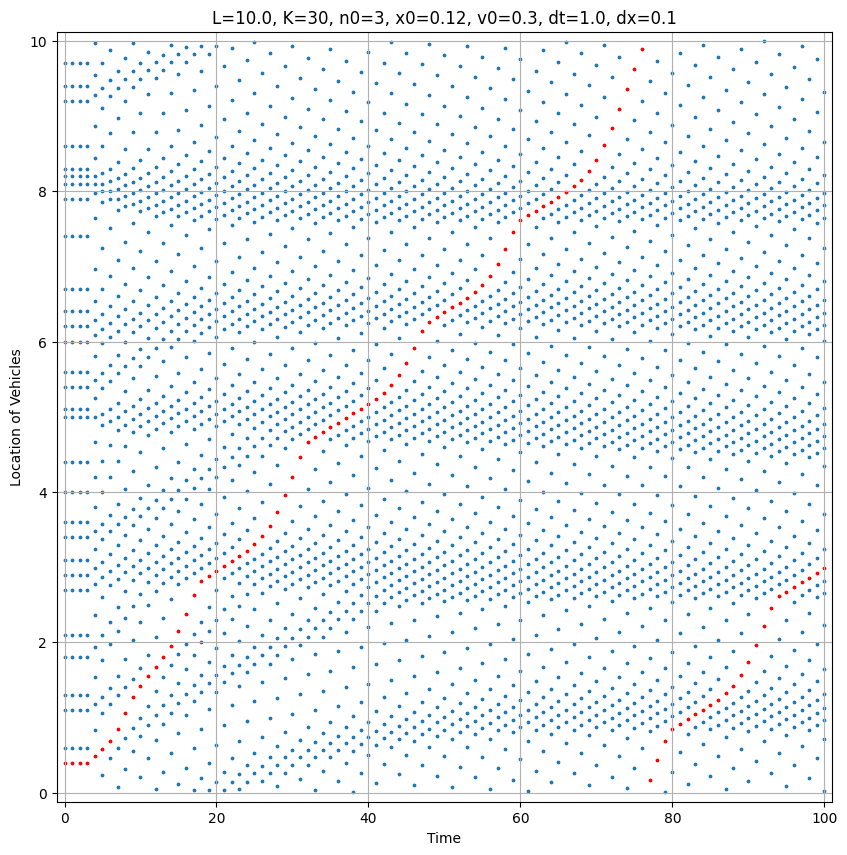

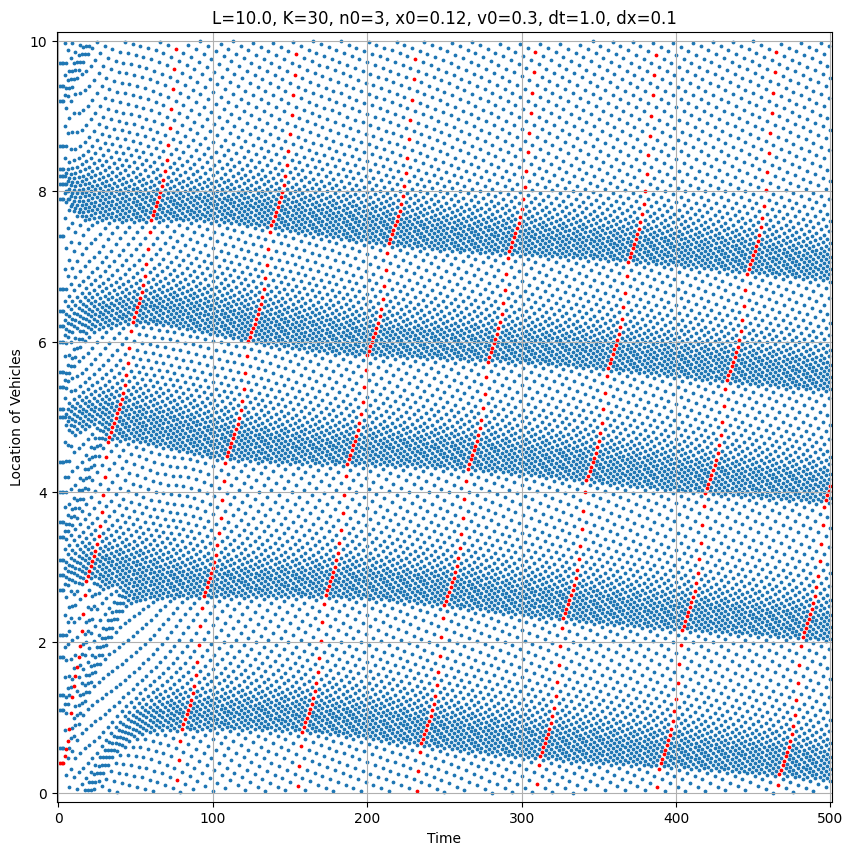

In [3]:
model = ds2s_OV_xmin(
	L=10.0,
	K=30,
	n_0=3,
	x_0=0.12,
	v_0=0.3,
	dt=1.0,
	dx=0.1,
	x_min=0.1,
	x_init=sorted(random.sample([0.1*i for i in range(100)], 30)),
	n_max=1010,
)
model.simulate()
plot_pattern(model, 0, 100)
plot_pattern(model, 0, 500)

## ds2s-OVモデルとの比較
同じ初期条件から、二つのモデルの時空図を描いた様子を並べて表示

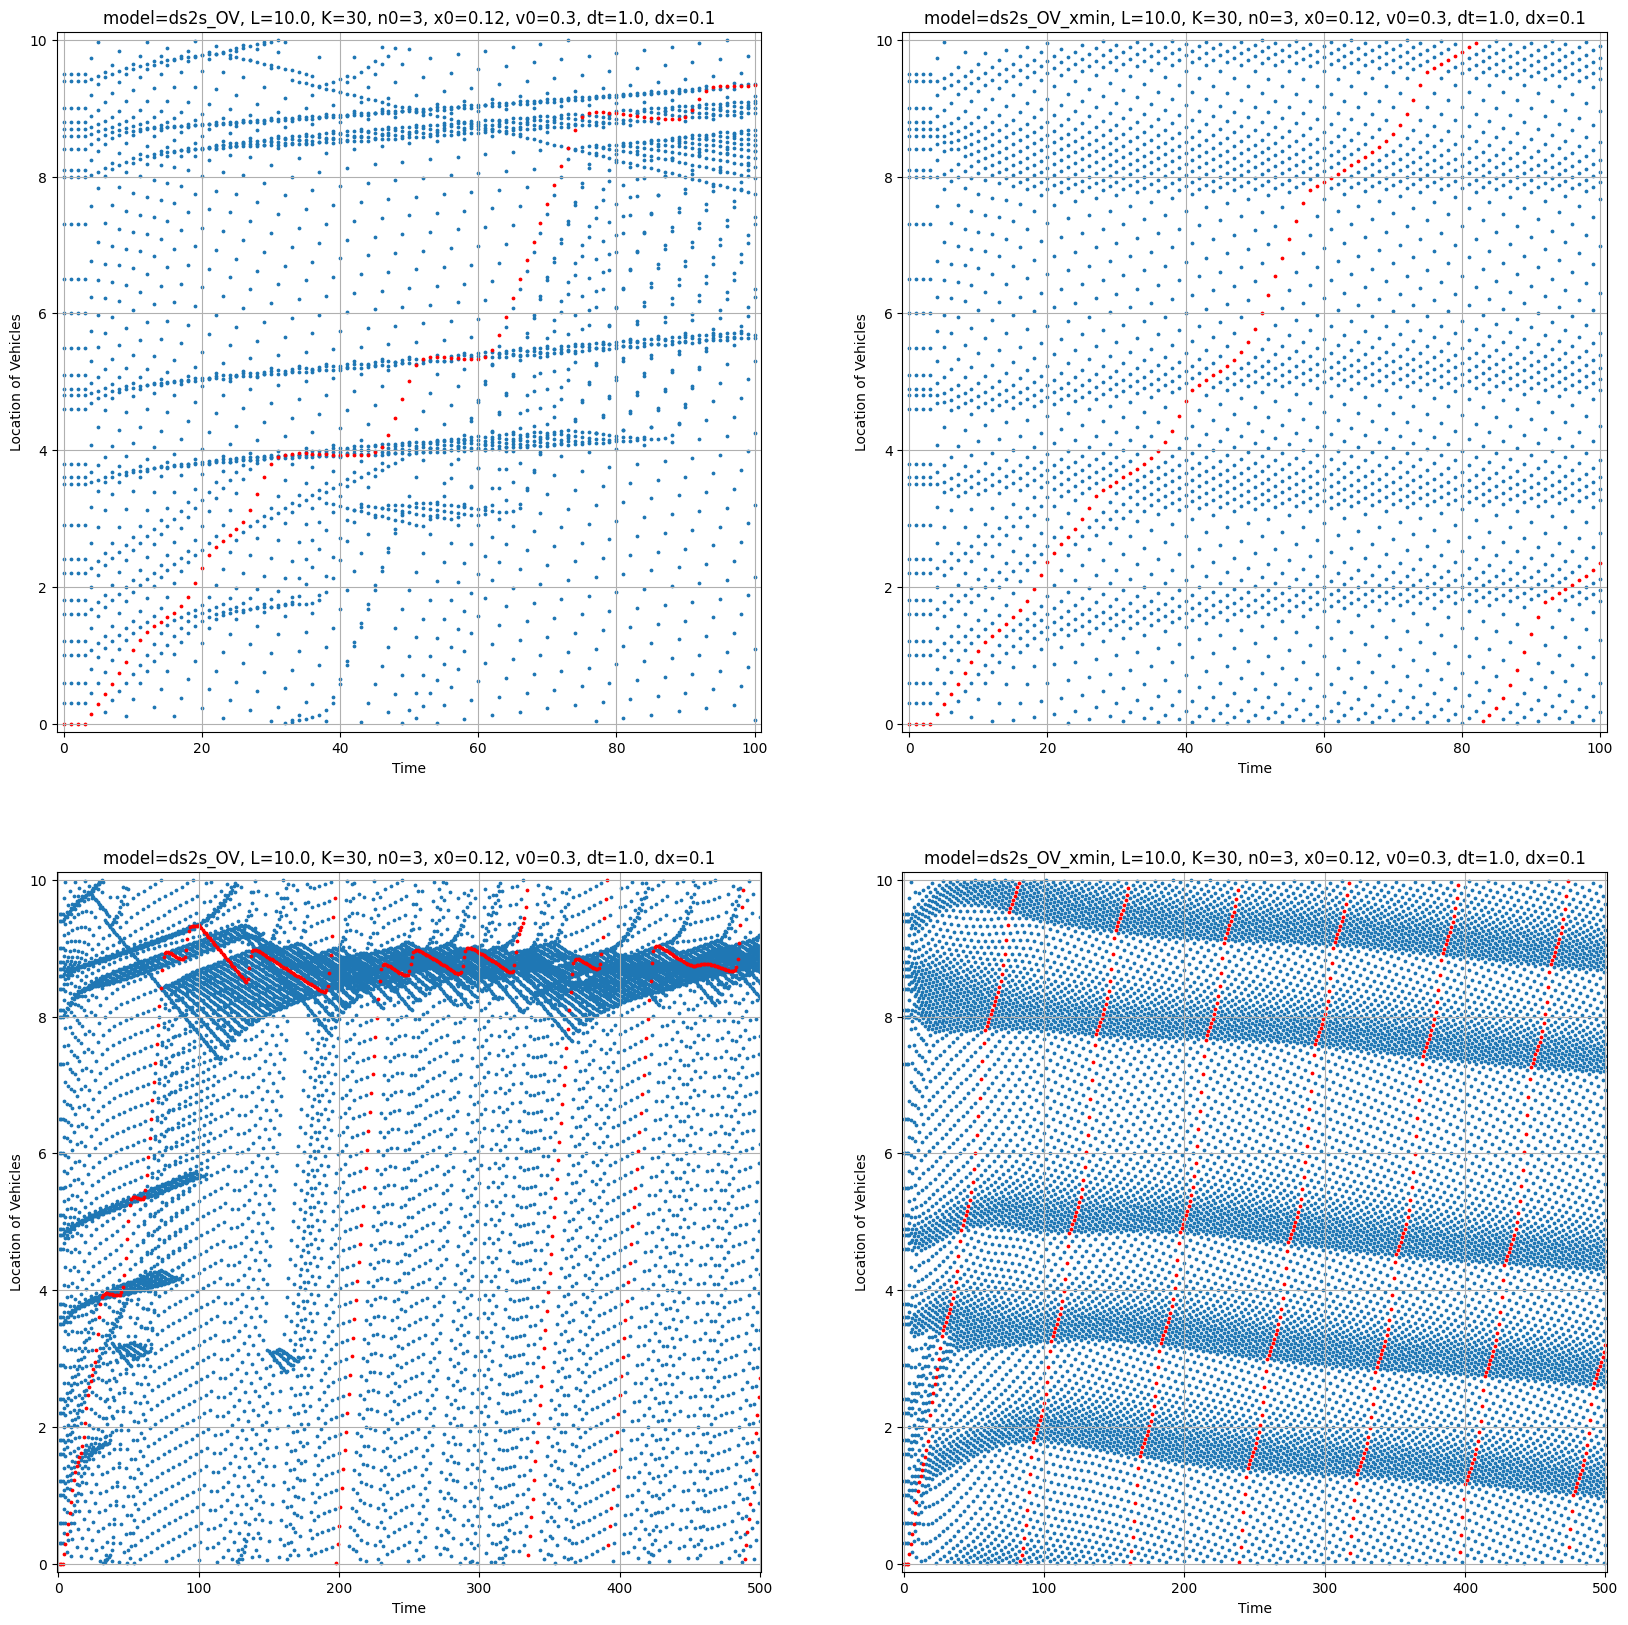

In [4]:
L = 10.0
K = 30
n_0 = 3
x_0 = 0.12
v_0 = 0.3
dt = 1.0
dx = 0.1
x_min = 0.1
x_init = sorted(random.sample([0.1*i for i in range(100)], K))

model1 = ds2s_OV(
	L=L,
	K=K,
	n_0=n_0,
	x_0=x_0,
	v_0=v_0,
	dt=dt,
	dx=dx,
	x_init=x_init,
	n_max=1010,
)
model2 = ds2s_OV_xmin(
	L=L,
	K=K,
	n_0=n_0,
	x_0=x_0,
	v_0=v_0,
	dt=dt,
	dx=dx,
	x_min=x_min,
	x_init=x_init,
	n_max=1010,
)
model1.simulate()
model2.simulate()

fig = plt.figure(figsize=(20, 20))
ax1 = fig.add_subplot(2, 2, 1)
ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2, 2, 3)
ax4 = fig.add_subplot(2, 2, 4)

plot_pattern(model1, 0, 100, ax=ax1)
plot_pattern(model2, 0, 100, ax=ax2)
plot_pattern(model1, 0, 500, ax=ax3)
plot_pattern(model2, 0, 500, ax=ax4)

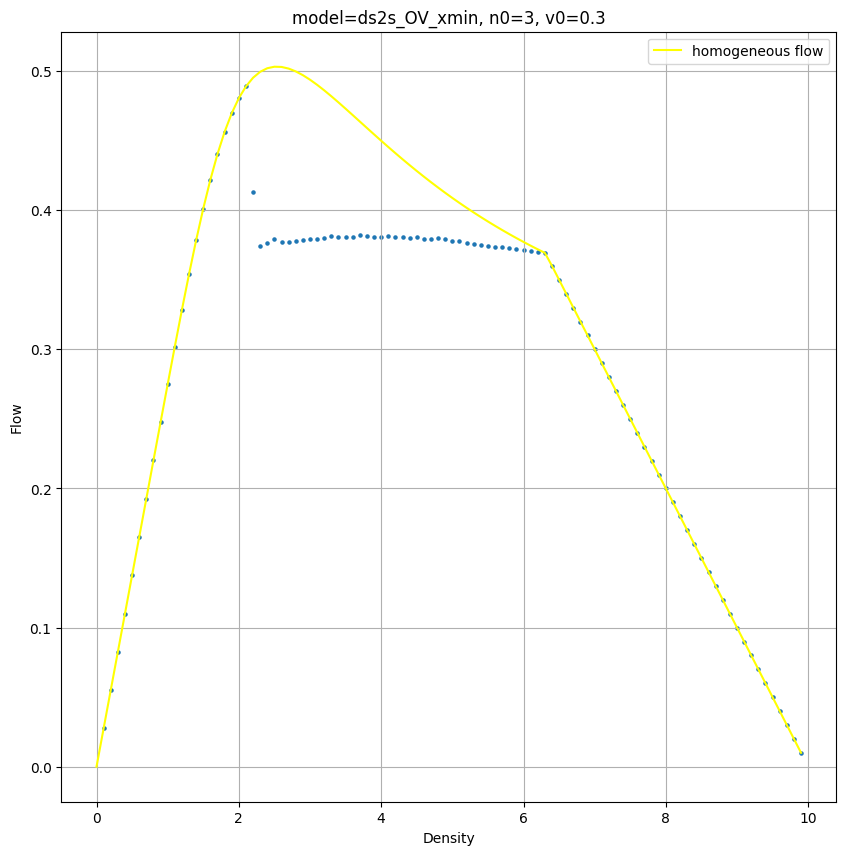

In [15]:
L = 10.0
n_0 = 3
x_0 = 0.12
v_0 = 0.3
dt = 1.0
dx = 0.1
x_min = 0.1

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(1, 1, 1)

density = [0.0]
flow = [0.0]
for K in range(1, int(L/x_min)):
	density.append(K/L)
	flow.append(ds2s_OV_xmin.flow_stable(
		density=K/L,
		x_0=x_0,
		v_0=v_0,
		dt=dt,
		dx=dx,
		xmin=x_min,
	))
ax.plot(density, flow, label='homogeneous flow', color='yellow')

density = []
flow = []
for K in range(1, int(L/x_min)):
	model = ds2s_OV_xmin(
		L=L,
		K=K,
		n_0=n_0,
		x_0=x_0,
		v_0=v_0,
		dt=dt,
		dx=dx,
		x_min=x_min,
		x_init=sorted([L/K * i for i in range(K)]),
		n_max=1010,
	)
	model.simulate()
	density.append(model.density())
	flow.append(model.flow(ni=900, nf=1000))

plot_fundamental(ax, model, density, flow)

ax.legend()

## 修正ds2s-OVモデルの基本図